In [1]:
import os

import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

from mtist import infer_mtist as im
from mtist import graphing_utils as gu

%config InlineBackend.figure_format='retina'

plt.rcParams["svg.fonttype"] = "none"
plt.rcParams.update({"font.family": "Helvetica"})

In [2]:
meta = (
    pd.read_csv("mtist_datasets/mtist_metadata.csv")
    .drop(columns="Unnamed: 0")
    .set_index("did")
)
meta

,n_species,ground_truth,noise,n_timeseries,n_timepoints,sampling_scheme
did,,,,,,
0,100,100_sp_gt,0.01,10,5,even
1,100,100_sp_gt,0.01,10,15,even
2,100,100_sp_gt,0.01,10,5,random
3,100,100_sp_gt,0.01,10,15,random
4,100,100_sp_gt,0.01,10,5,seq
...,...,...,...,...,...,...
643,3,3_sp_gt_8,0.10,50,15,even
644,3,3_sp_gt_8,0.10,50,5,random
645,3,3_sp_gt_8,0.10,50,15,random


In [3]:
def load_aij(method, did):
    path = f"mtist_datasets/{method}_inference_result/{method}_inferred_aij_{did}.csv"

    return np.loadtxt(path, delimiter=",")


def plot_aij(aij, save=False, fn=None):
    aij = np.around(aij, decimals=2)

    fig, ax = plt.subplots()

    sns.heatmap(
        aij, center=0, cmap="coolwarm", square=True, linewidths=1, vmax=0.3, vmin=-0.3
    )

    gu.remove_all_ticks(ax)

    if save and fn is None:
        raise ValueError("Must provide filename if saving")
    elif save and fn is not None:
        gu.savefig(fig, fn, ft="svg")


def get_sign_aij_and_matching_annot(aij, truth):
    testing_aij = aij.copy()
    testing_aij[testing_aij == 0] = np.nan

    tmp = np.array(np.sign(testing_aij) == np.sign(truth), dtype="float64")
    tmp[truth == 0] = np.nan
    tmp[aij == 0] = np.nan
    tmp[tmp == 0] = -1

    tmp2 = np.array(tmp.copy(), dtype=str)
    tmp2[tmp2 == "1.0"] = "✓"
    tmp2[tmp2 == "-1.0"] = "✗"

    tmp[aij == 0] = 0
    tmp2[aij == 0] = "0"

    return tmp, tmp2


def plot_sign_aij(get_sign_aij_and_matching_annot_result):
    
    tmp, tmp2 = get_sign_aij_and_matching_annot_result

    fig, ax = plt.subplots()

    plt.rcParams.update(
        {
            "font.family": "monospace",
        }
    )

    sns.heatmap(
        pd.DataFrame(tmp),
        center=0,
        cmap=sns.diverging_palette(300, 145, s=60, as_cmap=True),
        square=True,
        linewidths=1,
        vmax=1,
        vmin=-1,
        annot=pd.DataFrame(tmp2),
        fmt="",
        cbar=None,
    )

    gu.remove_all_ticks(ax)

    return fig, ax

In [4]:
did = 200

method1 = "default"
method2 = "ridge_CV"

#########################################################################################################

truth = np.loadtxt(
    f"ground_truths/interaction_coefficients/{meta.loc[did, 'ground_truth'].replace('gt', 'aij')}.csv",
    delimiter=",",
)

#########################################################################################################

aij1 = load_aij(method1, did)
aij2 = load_aij(method2, did)

#########################################################################################################

print(np.around(im.calculate_es_score(truth, aij1), decimals=4))
print(np.around(im.calculate_es_score(truth, aij2), decimals=4))

0.7024
0.5238


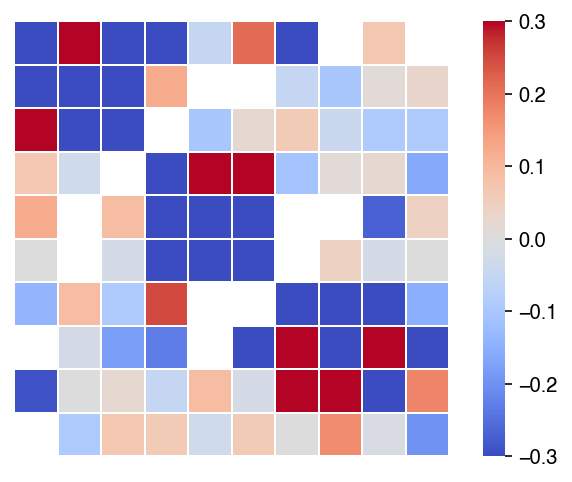

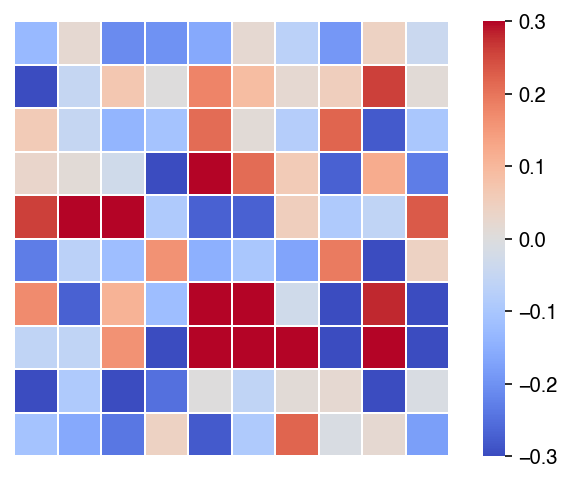

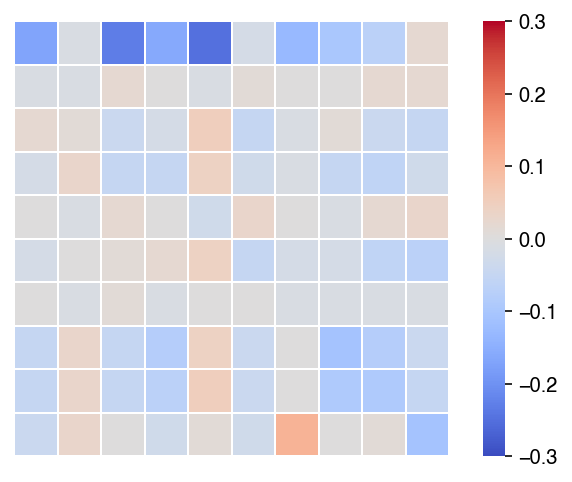

In [5]:
truth_plot = truth.copy()
truth_plot[truth_plot == 0] = np.nan

plot_aij(
    truth_plot,
    save=False,
    # fn=os.path.join(
    #     "exported_figures",
    #     "figure_4a",
    #     f"did={did}_gt",
    # ),
)

plot_aij(
    aij1,
    save=False,
    # fn=os.path.join(
    #     "exported_figures",
    #     "figure_4a",
    #     f"did={did}_method={method1}",
    # ),
)

plot_aij(
    aij2,
    save=False,
    # fn=os.path.join(
    #     "exported_figures",
    #     "figure_4a",
    #     f"did={did}_method={method2}",
    # ),
)

---

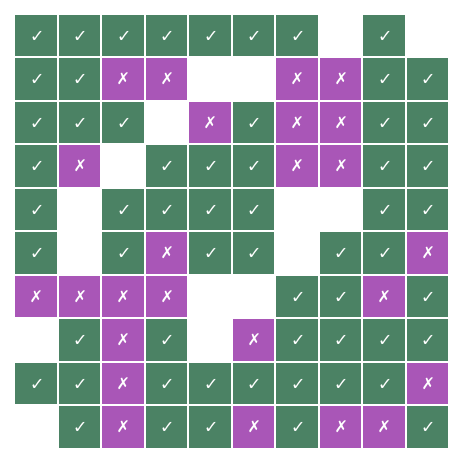

In [6]:
cur_aij = aij1
fig, ax = plot_sign_aij(get_sign_aij_and_matching_annot(cur_aij, truth))

# gu.savefig(
#     fig,
#     os.path.join("exported_figures", "figure_4a", f"did={did}_method={method1}_signs"),
#     ft="svg",
# )

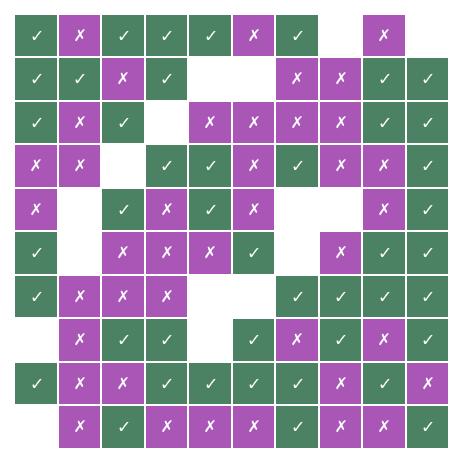

In [7]:
cur_aij = aij2
fig, ax = plot_sign_aij(get_sign_aij_and_matching_annot(cur_aij, truth))

# gu.savefig(
#     fig,
#     os.path.join("exported_figures", "figure_4a", f"did={did}_method={method2}_signs"),
#     ft="svg",
# )